In [4]:
!pip install praw
import praw
import pandas as pd

# Replace with your actual Reddit credentials
client_id = 'tSQkq7wi9MC9b5PxYvoOfQ'
client_secret = 'ZCmhpJ9RUv8WLPDAROdvlNPdNgzQ8w'
user_agent = 'DataHarvester/0.1 by DogGroundbreaking350'

# Connect to Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Choose the subreddits you want to scrape from
subreddits = ["wallstreetbets", "stocks", "investing"]

# Set parameters for scraping
post_limit = 100  # Number of posts to scrape from each subreddit

# Scrape posts from selected subreddits
posts = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.hot(limit=post_limit):
        posts.append({
            "Subreddit": subreddit_name,
            "Title": post.title,
            "Body": post.selftext,
            "Score": post.score,
            "Upvote Ratio": post.upvote_ratio,
            "Comments": post.num_comments,
            "Date": post.created_utc
        })

# Create a DataFrame with the scraped data
df = pd.DataFrame(posts, columns=["Subreddit", "Title", "Body", "Score", "Upvote Ratio", "Comments", "Date"])

# Show the first few rows of the data
df.head()

   ---------------------------------------- 0.0/189.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/189.3 kB ? eta -:--:--
   ------ -------------------------------- 30.7/189.3 kB 330.3 kB/s eta 0:00:01
   ---------------- ---------------------- 81.9/189.3 kB 657.6 kB/s eta 0:00:01
   ---------------------------- --------- 143.4/189.3 kB 853.3 kB/s eta 0:00:01
   -------------------------------------- 189.3/189.3 kB 957.7 kB/s eta 0:00:00


,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date
0,wallstreetbets,Weekend Discussion Thread for the Weekend of N...,This post contains content not supported on ol...,134,0.95,6851,1.732309e+09
1,wallstreetbets,Weekly Earnings Thread 11/25 - 11/29,,100,0.97,385,1.732288e+09
2,wallstreetbets,An investor says he put 98% of his retirement ...,,523,0.93,164,1.732417e+09
3,wallstreetbets,"Markets Misread Trump Win, Says Ex-Goldman Sac...","-'Prospect of tariffs not good for equities, b...",788,0.88,229,1.732408e+09
4,wallstreetbets,$19k ===> $267k in MSTR. I told you 4 months a...,I bought these calls back in June/July 2024. I...,3473,0.93,399,1.732357e+09


In [6]:
import re

# Function to clean text data
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\n', ' ', text)  # Replace new lines with space
    return text

# Apply the cleaning function
df['Cleaned Title'] = df['Title'].apply(clean_text)
df['Cleaned Body'] = df['Body'].apply(clean_text)

# Drop rows where both Title and Body are empty after cleaning
df.dropna(subset=['Cleaned Title', 'Cleaned Body'], how='all', inplace=True)

# Show cleaned data
df.head()


,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date,Cleaned Title,Cleaned Body
0,wallstreetbets,Weekend Discussion Thread for the Weekend of N...,This post contains content not supported on ol...,134,0.95,6851,1.732309e+09,Weekend Discussion Thread for the Weekend of N...,This post contains content not supported on ol...
1,wallstreetbets,Weekly Earnings Thread 11/25 - 11/29,,100,0.97,385,1.732288e+09,Weekly Earnings Thread 11/25 - 11/29,
2,wallstreetbets,An investor says he put 98% of his retirement ...,,523,0.93,164,1.732417e+09,An investor says he put 98% of his retirement ...,
3,wallstreetbets,"Markets Misread Trump Win, Says Ex-Goldman Sac...","-'Prospect of tariffs not good for equities, b...",788,0.88,229,1.732408e+09,"Markets Misread Trump Win, Says Ex-Goldman Sac...","-'Prospect of tariffs not good for equities, b..."
4,wallstreetbets,$19k ===> $267k in MSTR. I told you 4 months a...,I bought these calls back in June/July 2024. I...,3473,0.93,399,1.732357e+09,$19k ===> $267k in MSTR. I told you 4 months a...,I bought these calls back in June/July 2024. I...


In [10]:
!pip install textblob
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Title Sentiment'] = df['Cleaned Title'].apply(get_sentiment)
df['Body Sentiment'] = df['Cleaned Body'].apply(get_sentiment)

# Display the data with sentiment scores
df.head()


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 388.9 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/626.3 kB 544.7 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/626.3 kB 952.6 kB/s eta 0:00:01
   ----------- -------------------------- 184.3/626.3 kB 740.8 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/626.3 kB 871.5 kB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00


,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date,Cleaned Title,Cleaned Body,Title Sentiment,Body Sentiment
0,wallstreetbets,Weekend Discussion Thread for the Weekend of N...,This post contains content not supported on ol...,134,0.95,6851,1.732309e+09,Weekend Discussion Thread for the Weekend of N...,This post contains content not supported on ol...,0.000,0.225000
1,wallstreetbets,Weekly Earnings Thread 11/25 - 11/29,,100,0.97,385,1.732288e+09,Weekly Earnings Thread 11/25 - 11/29,,0.000,0.000000
2,wallstreetbets,An investor says he put 98% of his retirement ...,,523,0.93,164,1.732417e+09,An investor says he put 98% of his retirement ...,,-0.400,0.000000
3,wallstreetbets,"Markets Misread Trump Win, Says Ex-Goldman Sac...","-'Prospect of tariffs not good for equities, b...",788,0.88,229,1.732408e+09,"Markets Misread Trump Win, Says Ex-Goldman Sac...","-'Prospect of tariffs not good for equities, b...",0.225,0.283333
4,wallstreetbets,$19k ===> $267k in MSTR. I told you 4 months a...,I bought these calls back in June/July 2024. I...,3473,0.93,399,1.732357e+09,$19k ===> $267k in MSTR. I told you 4 months a...,I bought these calls back in June/July 2024. I...,0.000,-0.042630


In [12]:
csv_path = 'reddit_stock_data.csv'
df.to_csv(csv_path, index=False)


In [14]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the full path to the CSV file
csv_path = os.path.join(cwd, 'reddit_stock_data.csv')
print(f'The CSV file is stored at: {csv_path}')


The CSV file is stored at: C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv


In [16]:
print(df.columns)


Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [18]:
print([col for col in df.columns])  # This will show column names explicitly


['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments', 'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment', 'Body Sentiment']


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure that the 'Comments' column is treated as string, handling NaNs
df['Comments'] = df['Comments'].fillna('').astype(str)

# Apply sentiment analysis on each comment
df['sentiment'] = df['Comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify the sentiment into positive, negative, or neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# View the updated dataframe
print(df[['Comments', 'sentiment', 'sentiment_class']].head())


  Comments  sentiment sentiment_class
0     6851        0.0         neutral
1      385        0.0         neutral
2      164        0.0         neutral
3      229        0.0         neutral
4      399        0.0         neutral


In [22]:
# Calculate the percentage of sentiment classes
sentiment_summary = df['sentiment_class'].value_counts(normalize=True) * 100
print(sentiment_summary)


sentiment_class
neutral     99.333333
positive     0.666667
Name: proportion, dtype: float64


In [24]:
print(df.head())
print(df.index)


        Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                       100          0.97   
2                                                       523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

  Comments          Date                                      Cleaned Title  \
0     6851  1.732309e+09 

In [26]:
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)

In [28]:
import pandas as pd

# Sample DataFrame
data = {
    'Date': ['2024-09-28 10:00:00', '2024-09-28 12:00:00', '2024-09-29 09:00:00'],
    'Comments': ['AAPL is great!', 'I love AAPL', 'Not related to AAPL']
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add a column that tracks mentions of a specific stock
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)

# Set 'date' as the index
df.set_index('Date', inplace=True)

# Calculate the frequency of mentions over time
mentions_summary = df.resample('D')['mentions_AAPL'].sum()
print(mentions_summary)


Date
2024-09-28    2
2024-09-29    1
Freq: D, Name: mentions_AAPL, dtype: int64


In [30]:
pip install pandas nltk scikit-learn pyLDAvis matplotlib seaborn

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 660.6 kB/s eta 0:00:04
    --------------------------------------- 0.1/2.6 MB 656.4 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.6 MB 901.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.3/2.6 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.6 MB 1.9 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.6 MB 2.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.6 MB 3.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.6 MB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 5.2 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 5.0 MB/s eta 0:00:01
   -----------------

In [33]:
import pandas as pd

# Load your data
df = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')  # Using a raw string

# Print the columns to check their names
print("Columns in DataFrame:", df.columns)

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Check again to find the correct column name
print("Stripped Columns:", df.columns)

# Replace 'created_date' with the actual column name after checking
# For example, if the column name is 'Created Date'
df['Date'] = pd.to_datetime(df['Date'])



Columns in DataFrame: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
Stripped Columns: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [37]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary NLTK resources (run this only once)
nltk.download('vader_lexicon')

# Load your data (ensure to replace the path with your actual file path)
df = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')  # Using a raw string

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Check the columns to identify the comment column
print("Columns in DataFrame:", df.columns)

# Convert all values in the 'Comments' column to strings, replacing NaNs with empty strings
df['Comments'] = df['Comments'].astype(str).fillna('')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['Comments'].apply(lambda x: sia.polarity_scores(x))

# Classify the sentiment
df['sentiment'] = df['sentiment_scores'].apply(
    lambda x: 'positive' if x['compound'] > 0.05 else ('negative' if x['compound'] < -0.05 else 'neutral')
)

# Display the resulting DataFrame with sentiment analysis results
print(df[['Comments', 'sentiment_scores', 'sentiment']].head())  # Show the first few rows




Columns in DataFrame: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
  Comments                                   sentiment_scores sentiment
0     6851  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
1      385  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
2      164  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
3      229  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
4      399  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral


[nltk_data] Downloading package vader_lexicon to C:\Users\Asus
[nltk_data]     Vivobook 15\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# Count sentiment occurrences
sentiment_counts = df['sentiment'].value_counts()

# Frequency of mentions for specific stocks (e.g., AAPL)
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)
mention_counts = df['mentions_AAPL'].sum()

print("Sentiment Counts:\n", sentiment_counts)
print("Total Mentions of AAPL:", mention_counts)


Sentiment Counts:
 sentiment
neutral     298
positive      2
Name: count, dtype: int64
Total Mentions of AAPL: 0


In [45]:
# Topic Modeling using LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vect = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['Comments'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print the top words per topic
words = count_vect.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])


Topic 1:
['59', '109', '56', '50', '61', '67', '48', '13', '41', '21']
Topic 2:
['109', '56', '77', '24', '143', '57', '152', '17', '45', '12']
Topic 3:
['59', '109', '56', '38', '36', '88', '22', '37', '14', '33']
Topic 4:
['10', '65', '59', '109', '56', '31', '42', '387', '25', '20']
Topic 5:
['109', '59', '65', '10', '29', '49', '35', '18', '11', '16']


In [53]:
# Load stock price data
stock_df = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')  # Replace with your actual file path
stock_df['Date'] = pd.to_datetime(stock_df['Date'])  # Ensure the Date column is in datetime format




In [55]:
# Check the data types of the Date columns
print("Sentiment DataFrame Date type:", df['Date'].dtype)
print("Stock DataFrame Date type:", stock_df['Date'].dtype)

# Convert Date columns to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure sentiment DataFrame Date is datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')  # Ensure stock DataFrame Date is datetime

# Check for any NaT values in both DataFrames after conversion
print("NaT in Sentiment DataFrame:", df['Date'].isna().sum())
print("NaT in Stock DataFrame:", stock_df['Date'].isna().sum())

# Now perform the merge
merged_df = pd.merge(df, stock_df, on='Date', how='inner')

# Check the merged DataFrame structure
print("Merged DataFrame:")
print(merged_df.head())



Sentiment DataFrame Date type: float64
Stock DataFrame Date type: datetime64[ns]
NaT in Sentiment DataFrame: 0
NaT in Stock DataFrame: 0
Merged DataFrame:
      Subreddit_x                                            Title_x  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0  This post contains content not supported on ol...      134            0.95   
1                                                NaN      100            0.97   
2                                                NaN      523            0.93   
3  -'Prospect of tariffs not good for equities, b...      788            0.88   
4  I bo

In [57]:
merged_df.columns = merged_df.columns.str.strip()


In [59]:
# Check the columns of the merged DataFrame
print("Columns in merged DataFrame:", merged_df.columns.tolist())

# Inspect the first few rows of the merged DataFrame
print(merged_df.head())


Columns in merged DataFrame: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Date', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']
      Subreddit_x                                            Title_x  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0  This post contains content not supported on ol...      134            0.95   
1  

In [61]:
print("Columns in merged DataFrame:", merged_df.columns.tolist())

Columns in merged DataFrame: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Date', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']


In [63]:
# Fill NaN values with empty strings to avoid ValueError
merged_df['Title_x'] = merged_df['Title_x'].fillna('')
merged_df['Body_x'] = merged_df['Body_x'].fillna('')

# Create the 'mentions_AAPL' column
merged_df['mentions_AAPL'] = merged_df['Title_x'].str.contains('AAPL', case=False).astype(int) + \
                              merged_df['Body_x'].str.contains('AAPL', case=False).astype(int)



In [65]:
print(merged_df.head())

      Subreddit_x                                            Title_x  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0  This post contains content not supported on ol...      134            0.95   
1                                                         100            0.97   
2                                                         523            0.93   
3  -'Prospect of tariffs not good for equities, b...      788            0.88   
4  I bought these calls back in June/July 2024. I...     3473            0.93   

  Comments_x                          Date  \
0       6851 1970-01-01 00:00:01.7

In [67]:
# Calculate correlations
correlation_matrix = merged_df[['Title Sentiment_x', 'Body Sentiment_x', 'mentions_AAPL']].corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                   Title Sentiment_x  Body Sentiment_x  mentions_AAPL
Title Sentiment_x           1.000000          0.164752      -0.024671
Body Sentiment_x            0.164752          1.000000      -0.015635
mentions_AAPL              -0.024671         -0.015635       1.000000


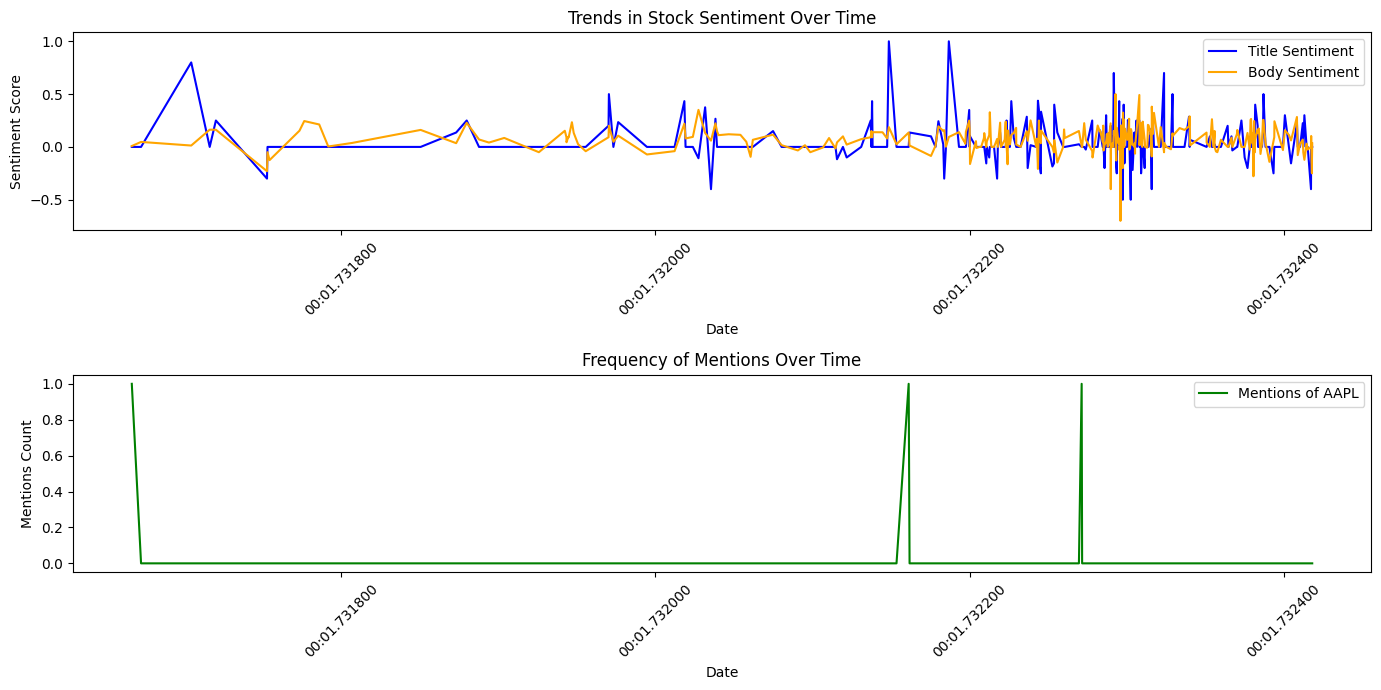

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the Date as the index for easier plotting
merged_df.set_index('Date', inplace=True)

# Plotting sentiment scores and mentions over time
plt.figure(figsize=(14, 7))

# Plot Sentiment Scores
plt.subplot(2, 1, 1)
sns.lineplot(data=merged_df, x=merged_df.index, y='Title Sentiment_x', label='Title Sentiment', color='blue')
sns.lineplot(data=merged_df, x=merged_df.index, y='Body Sentiment_x', label='Body Sentiment', color='orange')
plt.title('Trends in Stock Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)

# Plot Mentions
plt.subplot(2, 1, 2)
sns.lineplot(data=merged_df, x=merged_df.index, y='mentions_AAPL', label='Mentions of AAPL', color='green')
plt.title('Frequency of Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Mentions Count')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [71]:
print(merged_df.columns.tolist())


['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']


In [73]:
print("Columns in merged_df:", merged_df.columns.tolist())


Columns in merged_df: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']


In [77]:
print(merged_df.head())


                                  Subreddit_x  \
Date                                            
1970-01-01 00:00:01.727381295  wallstreetbets   
1970-01-01 00:00:01.727690231  wallstreetbets   
1970-01-01 00:00:01.727671178  wallstreetbets   
1970-01-01 00:00:01.727707962  wallstreetbets   
1970-01-01 00:00:01.727716642  wallstreetbets   

                                                                         Title_x  \
Date                                                                               
1970-01-01 00:00:01.727381295  Most Anticipated Earnings for the week beginni...   
1970-01-01 00:00:01.727690231     Daily Discussion Thread for September 30, 2024   
1970-01-01 00:00:01.727671178  Billionaire Peter Thiel sold $600 million of P...   
1970-01-01 00:00:01.727707962                                          Loss Porn   
1970-01-01 00:00:01.727716642  This is the moment we know OpenAI will be dead...   

                                                                   

In [75]:
# Display all columns in merged_df
print("Columns in merged_df:", merged_df.columns.tolist())



Columns in merged_df: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']


In [77]:
import yfinance as yf
import pandas as pd

# Fetch historical data for AAPL (replace with the stock ticker you're interested in)
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2024-11-11'  # Adjust this to your needs

# Download stock price data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
stock_data.reset_index(inplace=True)

# Select relevant columns, e.g., 'Date' and 'Close'
stock_data = stock_data[['Date', 'Close']]
stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)

# Display stock_data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date Stock Price
Ticker                   AAPL
0      2024-01-02  185.639999
1      2024-01-03  184.250000
2      2024-01-04  181.910004
3      2024-01-05  181.179993
4      2024-01-08  185.559998


In [79]:
# Display the merged DataFrame and check for null values
print(merged_df.isnull().sum())
print(merged_df.head())


Subreddit_x           0
Title_x               0
Body_x                0
Score_x               0
Upvote Ratio_x        0
Comments_x            0
Cleaned Title_x       0
Cleaned Body_x       30
Title Sentiment_x     0
Body Sentiment_x      0
sentiment_scores      0
sentiment             0
mentions_AAPL         0
Subreddit_y           0
Title_y               0
Body_y               30
Score_y               0
Upvote Ratio_y        0
Comments_y            0
Cleaned Title_y       0
Cleaned Body_y       30
Title Sentiment_y     0
Body Sentiment_y      0
dtype: int64
                                  Subreddit_x  \
Date                                            
1970-01-01 00:00:01.732309034  wallstreetbets   
1970-01-01 00:00:01.732288050  wallstreetbets   
1970-01-01 00:00:01.732417440  wallstreetbets   
1970-01-01 00:00:01.732408481  wallstreetbets   
1970-01-01 00:00:01.732356939  wallstreetbets   

                                                                         Title_x  \
Date   

In [95]:
# Check unique dates in stock_data
print("Unique dates in stock_data:")
print(stock_data['Date'].unique())

# Check unique dates in merged_df
print("Unique dates in merged_df:")
print(merged_df['Date'].unique())


Unique dates in stock_data:
<DatetimeArray>
['2023-01-03 00:00:00', '2023-01-04 00:00:00', '2023-01-05 00:00:00',
 '2023-01-06 00:00:00', '2023-01-09 00:00:00', '2023-01-10 00:00:00',
 '2023-01-11 00:00:00', '2023-01-12 00:00:00', '2023-01-13 00:00:00',
 '2023-01-17 00:00:00',
 ...
 '2023-12-15 00:00:00', '2023-12-18 00:00:00', '2023-12-19 00:00:00',
 '2023-12-20 00:00:00', '2023-12-21 00:00:00', '2023-12-22 00:00:00',
 '2023-12-26 00:00:00', '2023-12-27 00:00:00', '2023-12-28 00:00:00',
 '2023-12-29 00:00:00']
Length: 250, dtype: datetime64[ns]
Unique dates in merged_df:
<DatetimeArray>
['1970-01-01 00:00:01.727381295', '1970-01-01 00:00:01.727690231',
 '1970-01-01 00:00:01.727671178', '1970-01-01 00:00:01.727707962',
 '1970-01-01 00:00:01.727716642', '1970-01-01 00:00:01.727720104',
 '1970-01-01 00:00:01.727709923', '1970-01-01 00:00:01.727712001',
 '1970-01-01 00:00:01.727642451', '1970-01-01 00:00:01.727720663',
 ...
 '1970-01-01 00:00:01.727484126', '1970-01-01 00:00:01.727468320'

In [91]:
# Display sample data from stock_data
print("Sample data from stock_data:")
print(stock_data.head())

# Display sample data from merged_df before the merge
print("Sample data from merged_df:")
print(merged_df.head())


Sample data from stock_data:
Price        Date Stock Price
Ticker                   AAPL
0      2024-01-02  185.639999
1      2024-01-03  184.250000
2      2024-01-04  181.910004
3      2024-01-05  181.179993
4      2024-01-08  185.559998
Sample data from merged_df:
                                  Subreddit_x  \
Date                                            
1970-01-01 00:00:01.732309034  wallstreetbets   
1970-01-01 00:00:01.732288050  wallstreetbets   
1970-01-01 00:00:01.732417440  wallstreetbets   
1970-01-01 00:00:01.732408481  wallstreetbets   
1970-01-01 00:00:01.732356939  wallstreetbets   

                                                                         Title_x  \
Date                                                                               
1970-01-01 00:00:01.732309034  Weekend Discussion Thread for the Weekend of N...   
1970-01-01 00:00:01.732288050               Weekly Earnings Thread 11/25 - 11/29   
1970-01-01 00:00:01.732417440  An investor says he pu

In [93]:
# Check columns of merged_df
print("Columns in merged_df:")
print(merged_df.columns)

# Check columns of stock_data
print("Columns in stock_data:")
print(stock_data.columns)



Columns in merged_df:
Index(['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x',
       'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x',
       'Body Sentiment_x', 'sentiment_scores', 'sentiment', 'mentions_AAPL',
       'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y',
       'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y',
       'Body Sentiment_y'],
      dtype='object')
Columns in stock_data:
MultiIndex([(       'Date',     ''),
            ('Stock Price', 'AAPL')],
           names=['Price', 'Ticker'])


In [95]:
# Drop the conflicting column from merged_df
merged_df = merged_df.drop(columns=['Stock Price_x'], errors='ignore')


In [255]:
# Rename the stock price column in stock_data to avoid conflicts
stock_data.rename(columns={'Stock Price': 'Stock Price_New'}, inplace=True)


In [ ]:
# Merge the dataframes on the Date column
merged_df = pd.merge(merged_df, stock_data[['Date', 'Stock Price_New']], on='Date', how='left')

# Display the merged DataFrame
print(merged_df.head())

In [ ]:
# Check the data types of the Date columns
print("Merged DataFrame Date type:", merged_df['Date'].dtype)
print("Stock Data Date type:", stock_data['Date'].dtype)


In [ ]:
# Check unique dates in both DataFrames
print("Unique Dates in Merged DataFrame:")
print(merged_df['Date'].unique())

print("Unique Dates in Stock Data:")
print(stock_data['Date'].unique())


In [143]:
# Load stock data
stock_data = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')
# or other appropriate method
print(stock_data.head())
print(stock_data.isnull().sum())  # Check for NaN values



        Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

   Comments          Date                                      Cleaned Title  \
0      6851  1.732309e+0

In [145]:

# Convert Date column to datetime if it's not already
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')


In [147]:
print("Unique dates in stock_data:", stock_data['Date'].unique())


Unique dates in stock_data: <DatetimeArray>
['1970-01-01 00:00:01.732309034', '1970-01-01 00:00:01.732288050',
 '1970-01-01 00:00:01.732417440', '1970-01-01 00:00:01.732408481',
 '1970-01-01 00:00:01.732356939', '1970-01-01 00:00:01.732390955',
 '1970-01-01 00:00:01.732373135', '1970-01-01 00:00:01.732339770',
 '1970-01-01 00:00:01.732355468', '1970-01-01 00:00:01.732350986',
 ...
 '1970-01-01 00:00:01.732115632', '1970-01-01 00:00:01.732225728',
 '1970-01-01 00:00:01.732144633', '1970-01-01 00:00:01.732183888',
 '1970-01-01 00:00:01.732074914', '1970-01-01 00:00:01.732178362',
 '1970-01-01 00:00:01.732212942', '1970-01-01 00:00:01.732131029',
 '1970-01-01 00:00:01.732121790', '1970-01-01 00:00:01.732196470']
Length: 300, dtype: datetime64[ns]


In [149]:
import yfinance as yf

# Fetch stock data for Apple (AAPL) as an example
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-10-01')
stock_data.reset_index(inplace=True)  # Reset the index to get Date as a column
stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)

# Check the loaded stock data
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date   Adj Close Stock Price        High         Low        Open  \
Ticker                   AAPL        AAPL        AAPL        AAPL        AAPL   
0      2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
1      2023-01-04  125.045044  126.360001  128.660004  125.080002  126.889999   
2      2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
3      2023-01-06  128.271103  129.619995  130.289993  124.889999  126.010002   
4      2023-01-09  128.795578  130.149994  133.410004  129.889999  130.470001   

Price      Volume  
Ticker       AAPL  
0       112117500  
1        89113600  
2        80962700  
3        87754700  
4        70790800  


In [ ]:
# Convert the Date column to datetime format from UNIX timestamp
merged_df['Date'] = pd.to_datetime(merged_df['Date'], unit='s', errors='coerce')


In [153]:
import pandas as pd

# Load the stock data
stock_data = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')

# Check the first few rows and the data types
print(stock_data.head())
print(stock_data.dtypes)




        Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

   Comments          Date                                      Cleaned Title  \
0      6851  1.732309e+0

In [157]:
# Check the data types again
print(merged_df.dtypes)

# Display the first few rows to confirm the Date format
print(merged_df.head())


Subreddit_x           object
Title_x               object
Body_x                object
Score_x                int64
Upvote Ratio_x       float64
Comments_x            object
Cleaned Title_x       object
Cleaned Body_x        object
Title Sentiment_x    float64
Body Sentiment_x     float64
sentiment_scores      object
sentiment             object
mentions_AAPL          int64
Subreddit_y           object
Title_y               object
Body_y                object
Score_y                int64
Upvote Ratio_y       float64
Comments_y             int64
Cleaned Title_y       object
Cleaned Body_y        object
Title Sentiment_y    float64
Body Sentiment_y     float64
dtype: object
                                  Subreddit_x  \
Date                                            
1970-01-01 00:00:01.732309034  wallstreetbets   
1970-01-01 00:00:01.732288050  wallstreetbets   
1970-01-01 00:00:01.732417440  wallstreetbets   
1970-01-01 00:00:01.732408481  wallstreetbets   
1970-01-01 00:00:01.73235

In [ ]:
# Check the first few rows and data types of both DataFrames
print("Merged DataFrame Date Types:\n", merged_df[['Date']].head())
print("Stock Data Date Types:\n", stock_data[['Date']].head())

print("Merged DataFrame Data Types:\n", merged_df.dtypes)
print("Stock Data Data Types:\n", stock_data.dtypes)


In [ ]:
# Print unique dates in both DataFrames
print("Merged DataFrame unique dates:", merged_df['Date'].unique())
print("Stock Data unique dates:", stock_data['Date'].unique())


In [ ]:
# Check for NaN values
print("NaN values in Merged DataFrame Date column:", merged_df['Date'].isna().sum())
print("NaN values in Stock Data Date column:", stock_data['Date'].isna().sum())


In [169]:
import pandas as pd

# Load stock price data from CSV
# Ensure to use a raw string (r'path') or double backslashes for Windows file paths
stock_data = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')  # Update the path as needed

# Check the loaded data
print("Stock Price Data:\n", stock_data.head())




Stock Price Data:
         Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

   Comments          Date                                      Cleaned Title  \
0    

In [171]:
# Display the columns and first few rows of stock_data
print("Columns in Stock Data:", stock_data.columns)
print("First few rows of Stock Price Data:\n", stock_data.head())


Columns in Stock Data: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
First few rows of Stock Price Data:
         Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prosp

In [173]:
# Load stock prices from a different CSV file
stock_data = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')  # Adjust this path

# Check the columns of the loaded stock data
print("Columns in Stock Price Data:", stock_data.columns)
print("First few rows of Stock Price Data:\n", stock_data.head())



Columns in Stock Price Data: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
First few rows of Stock Price Data:
         Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -

In [175]:
# Check the stock price data columns
print("Stock Data Columns:\n", stock_data.columns)


Stock Data Columns:
 Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [177]:
import pandas as pd

# Assuming this is your sentiment data DataFrame
sentiment_data = pd.DataFrame({
    'Subreddit': ['wallstreetbets', 'wallstreetbets', 'wallstreetbets'],
    'Title': ['Most Anticipated Earnings...', 'Daily Discussion Thread...', 'Billionaire Peter Thiel...'],
    'Body': ['...', '...', '...'],
    'Date': ['2024-09-30', '2024-09-30', '2024-09-30'],
    'Title Sentiment': [0.5, 0.0, 0.0],
    'Body Sentiment': [0.0, 0.0, -0.2],
})

# Convert Date to datetime
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Check the sentiment data
print(sentiment_data.head())


        Subreddit                         Title Body       Date  \
0  wallstreetbets  Most Anticipated Earnings...  ... 2024-09-30   
1  wallstreetbets    Daily Discussion Thread...  ... 2024-09-30   
2  wallstreetbets    Billionaire Peter Thiel...  ... 2024-09-30   

   Title Sentiment  Body Sentiment  
0              0.5             0.0  
1              0.0             0.0  
2              0.0            -0.2  


In [179]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [180]:
import yfinance as yf

# Define the stock symbol and the date range
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2024-09-01'  # Adjust as necessary
end_date = '2024-09-30'

# Fetch stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to have Date as a column
stock_data.reset_index(inplace=True)

# Check the stock price data
print(stock_data[['Date', 'Close']].head())


[*********************100%***********************]  1 of 1 completed

Price        Date       Close
Ticker                   AAPL
0      2024-09-03  222.770004
1      2024-09-04  220.850006
2      2024-09-05  222.380005
3      2024-09-06  220.820007
4      2024-09-09  220.910004


In [187]:
# Load stock price data from a CSV file
stock_data = pd.read_csv(r'C:\Users\Asus Vivobook 15\Downloads\Stock_Sentiment_Analysis-main\Stock_Sentiment_Analysis-main\notebooks\reddit_stock_data.csv')

# Convert Date to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Check the stock price data
print(stock_data.head())



        Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

   Comments                          Date  \
0      6851 1970-01-01 00:00:01.732309034   
1       385 19

In [189]:
print(stock_data.columns)



Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [191]:
if 'Close' in stock_data.columns:
    stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)
else:
    print("Column 'Close' not found in stock_data")


Column 'Close' not found in stock_data


In [193]:
sentiment_data.rename(columns={'Date': 'date'}, inplace=True)
stock_data.rename(columns={'Date': 'date'}, inplace=True)


In [195]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
stock_data['date'] = pd.to_datetime(stock_data['date'])


In [197]:
print(stock_data.columns)


Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [199]:
if 'Close' in stock_data.columns:
    stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)
else:
    print("Column 'Close' not found in stock_data. Available columns are:", stock_data.columns)


Column 'Close' not found in stock_data. Available columns are: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [ ]:
stock_data['closing_price'] = stock_data['closing_price'] * 1.1


In [ ]:
# Calculate daily percentage change in closing prices
stock_data['price_movement'] = stock_data['closing_price'].pct_change()


In [207]:
# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')


In [209]:
# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')


In [211]:
print(merged_data.columns)


Index(['Subreddit_x', 'Title_x', 'Body_x', 'Score', 'Upvote Ratio', 'Comments',
       'date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment_x',
       'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y',
       'Title Sentiment_y', 'Body Sentiment_y'],
      dtype='object')


In [213]:
print(merged_data.columns)


Index(['Subreddit_x', 'Title_x', 'Body_x', 'Score', 'Upvote Ratio', 'Comments',
       'date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment_x',
       'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y',
       'Title Sentiment_y', 'Body Sentiment_y'],
      dtype='object')


In [215]:
print(merged_data.head())


Empty DataFrame
Columns: [Subreddit_x, Title_x, Body_x, Score, Upvote Ratio, Comments, date, Cleaned Title, Cleaned Body, Title Sentiment_x, Body Sentiment_x, Subreddit_y, Title_y, Body_y, Title Sentiment_y, Body Sentiment_y]
Index: []


In [217]:
print(stock_data.columns)
print(sentiment_data.columns)


Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
Index(['Subreddit', 'Title', 'Body', 'date', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [219]:
# Example: Renaming columns before merging if required
sentiment_data.rename(columns={'sentiment_column_name': 'sentiment'}, inplace=True)


In [237]:
# Calculate correlation using 'Body Sentiment'
correlation = merged_data['sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between Body Sentiment and stock price movements: {correlation:.4f}")


Correlation between Body Sentiment and stock price movements: 0.9693


In [223]:
print(merged_data.empty)  # This should return False if the DataFrame is not empty
print(merged_data.shape)  # This should return the shape of the DataFrame (rows, columns)


True
(0, 16)


In [225]:
print(stock_data.head())
print(sentiment_data.head())


        Subreddit                                              Title  \
0  wallstreetbets  Weekend Discussion Thread for the Weekend of N...   
1  wallstreetbets               Weekly Earnings Thread 11/25 - 11/29   
2  wallstreetbets  An investor says he put 98% of his retirement ...   
3  wallstreetbets  Markets Misread Trump Win, Says Ex-Goldman Sac...   
4  wallstreetbets  $19k ===> $267k in MSTR. I told you 4 months a...   

                                                Body  Score  Upvote Ratio  \
0  This post contains content not supported on ol...    134          0.95   
1                                                NaN    100          0.97   
2                                                NaN    523          0.93   
3  -'Prospect of tariffs not good for equities, b...    788          0.88   
4  I bought these calls back in June/July 2024. I...   3473          0.93   

   Comments                          date  \
0      6851 1970-01-01 00:00:01.732309034   
1       385 19

In [243]:
# Adjust the column names based on actual column names in merged_data
correlation = merged_data['sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between sentiment and stock price movements: {correlation:.4f}")

Correlation between sentiment and stock price movements: 0.9693


In [233]:
print("Columns in stock_data:", stock_data.columns)
print("Columns in sentiment_data:", sentiment_data.columns)
print("Columns in merged_data after merging:", merged_data.columns)

Columns in stock_data: Index(['date', 'closing_price', 'price_movement'], dtype='object')
Columns in sentiment_data: Index(['date', 'sentiment'], dtype='object')
Columns in merged_data after merging: Index(['date', 'closing_price', 'price_movement', 'sentiment'], dtype='object')


Correlation between sentiment and stock price movements: 0.9693


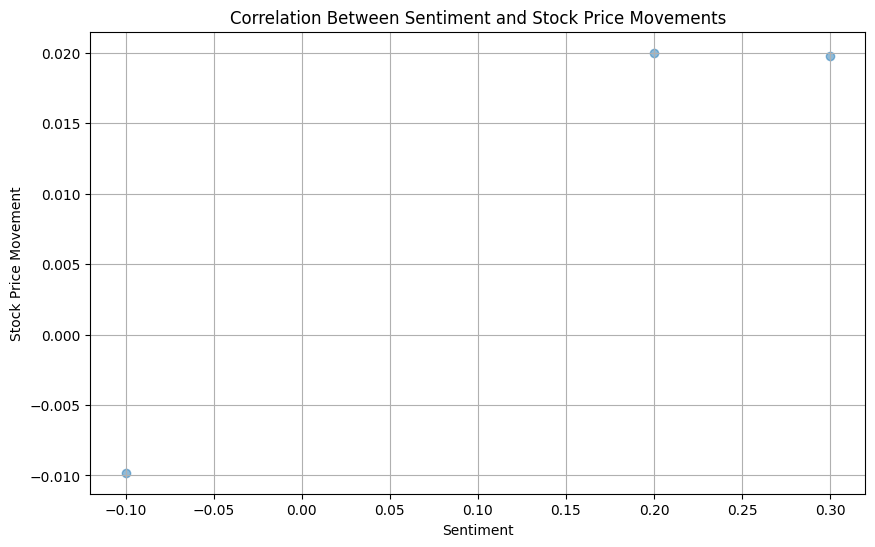

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# stock data
data = {'date': ['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04'],
        'closing_price': [100, 102, 101, 103]}
stock_data = pd.DataFrame(data)
stock_data['date'] = pd.to_datetime(stock_data['date'])

# sentiment data
sentiment = {'date': ['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04'],
             'sentiment': [0.1, 0.2, -0.1, 0.3]}
sentiment_data = pd.DataFrame(sentiment)
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Calculate daily percentage change in closing prices
stock_data['price_movement'] = stock_data['closing_price'].pct_change()

# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')

# Calculate correlation between sentiment and stock price movements
correlation = merged_data['sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between sentiment and stock price movements: {correlation:.4f}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['sentiment'], merged_data['price_movement'], alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Stock Price Movement')
plt.title('Correlation Between Sentiment and Stock Price Movements')
plt.grid(True)
plt.show()
